In [303]:
import itertools
import re
import unicodedata
import string
import json
import os
import nltk
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import OrderedDict, Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

sns.set(style="whitegrid")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


In [304]:
business_data_path = "C:\\Users\\kasam\\OneDrive\\Desktop\\data\\yelp_dataset_challenge_academic_dataset\\yelp_academic_dataset_business.json"
reviews_data_path = "C:\\Users\\kasam\\OneDrive\\Desktop\\data\\yelp_dataset_challenge_academic_dataset\\yelp_academic_dataset_review.json"
dishname_annotations_path = "C:\\Users\\kasam\\OneDrive\\Desktop\\data\\student_dn_annotations.txt"
quality_mexican_path = "C:\\Users\\kasam\\OneDrive\\Desktop\\data\\MexicanDish_Quality.txt.txt"
corrected_mexican_dish_path = "C:\\Users\\kasam\\OneDrive\\Desktop\\data\\Mexican_corrected.label"


In [305]:
# Define target cuisine and initialize containers
target_cuisine = 'Mexican'
mexican_restaurant_ids = []
mexican_restaurant_dict = {}

# Open and process the business data file
with open(business_data_path, 'r', encoding='utf-8') as business_file:
    business_lines = business_file.readlines()
    
for line in business_lines:
    business_record = json.loads(line)
    
    # Check if the restaurant serves the target cuisine
    categories = business_record.get('categories', [])
    if target_cuisine in categories:
        restaurant_id = business_record['business_id']
        mexican_restaurant_ids.append(restaurant_id)
        mexican_restaurant_dict[restaurant_id] = business_record['name']


In [306]:
%%time

# Initialize containers for review data
review_texts = []
review_stars = []
restaurant_names = []

# Open and process the reviews data file
with open(reviews_data_path, 'r', encoding='utf-8') as review_file:
    for line in review_file:
        review_data = json.loads(line)
        business_id = review_data['business_id']
        
        # Check if the business ID is in the list of Mexican restaurant IDs
        if business_id in mexican_restaurant_ids:
            review_texts.append(review_data['text'])
            review_stars.append(review_data['stars'])
            restaurant_names.append(mexican_restaurant_dict[business_id])

# Output the number of collected reviews, stars, and restaurant names
print(f"Total reviews: {len(review_texts)}")
print(f"Total stars: {len(review_stars)}")
print(f"Total restaurant names: {len(restaurant_names)}")


Total reviews: 70406
Total stars: 70406
Total restaurant names: 70406
CPU times: total: 31.6 s
Wall time: 55.2 s


In [307]:
# Initialize a list to hold the dish names
mexican_dish_list = []

# Open and process the corrected Mexican dish file
with open(corrected_mexican_dish_path, 'r') as dish_file:
    for line in dish_file:
        dish_data = line.strip().split("\t")
        if dish_data[1] == "1":
            mexican_dish_list.append(dish_data[0])

# Output the number of dishes and the list of dishes
print(f"Total dishes: {len(mexican_dish_list)}")
mexican_dish_list


Total dishes: 23


['carne asada',
 'refried beans',
 'mole sauce',
 'tacos al pastor',
 'huevos rancheros',
 'enchiladas and tacos',
 'guacamole',
 'salsa verde',
 'chiles rellenos',
 'tamales',
 'pozole',
 'elote',
 'tostadas',
 'flautas',
 'birria',
 'churros',
 'barbacoa',
 'sopes',
 'cochinita pibil',
 'carne adobada',
 'carnitas',
 'nopalitos',
 'mole chicken']

In [308]:
# Initialize a dictionary to count the occurrences of each dish in reviews
dish_occurrences = dict(zip(mexican_dish_list, [0] * len(mexican_dish_list)))

# Process each review to count the occurrences of each dish
for dish in mexican_dish_list:
    for review in review_texts:
        cleaned_review = review.replace("\t", " ")\
                               .replace("\n", " ")\
                               .replace("\r", " ")\
                               .lower().strip()
        dish_occurrences[dish] += cleaned_review.count(dish.lower())

# Output the dish occurrences
dish_occurrences


{'carne asada': 7809,
 'refried beans': 1152,
 'mole sauce': 259,
 'tacos al pastor': 131,
 'huevos rancheros': 269,
 'enchiladas and tacos': 33,
 'guacamole': 7354,
 'salsa verde': 297,
 'chiles rellenos': 56,
 'tamales': 1605,
 'pozole': 177,
 'elote': 260,
 'tostadas': 470,
 'flautas': 505,
 'birria': 93,
 'churros': 399,
 'barbacoa': 715,
 'sopes': 186,
 'cochinita pibil': 201,
 'carne adobada': 34,
 'carnitas': 2937,
 'nopalitos': 14,
 'mole chicken': 53}

In [309]:
# Number of top dishes to select
N = 25

# Sort the dish occurrences dictionary by count in descending order
sorted_dish_occurrences = {dish: count for dish, count in sorted(dish_occurrences.items(), key=lambda item: item[1], reverse=True)}

# Get the top N dishes
top_dishes = dict(itertools.islice(sorted_dish_occurrences.items(), N))

# Create a DataFrame from the top dishes dictionary
top_dishes_df = pd.DataFrame(top_dishes.items(), columns=["Dish_Name", "Count"])

# Output the DataFrame
top_dishes_df


,Dish_Name,Count
0,carne asada,7809
1,guacamole,7354
2,carnitas,2937
3,tamales,1605
4,refried beans,1152
5,barbacoa,715
6,flautas,505
7,tostadas,470
8,churros,399
9,salsa verde,297


In [310]:
topN

{'carne asada': 692,
 'guacamole': 674,
 'carnitas': 451,
 'refried beans': 411,
 'tamales': 295,
 'tostadas': 196,
 'flautas': 192,
 'salsa verde': 161,
 'churros': 117,
 'huevos rancheros': 110,
 'mole sauce': 104,
 'barbacoa': 95,
 'sopes': 71,
 'pozole': 65,
 'tacos al pastor': 57,
 'elote': 40,
 'birria': 40,
 'chiles rellenos': 37,
 'enchiladas and tacos': 30,
 'cochinita pibil': 25,
 'mole chicken': 22,
 'carne adobada': 18,
 'nopalitos': 9}

C:\Users\kasam\AppData\Local\Temp\ipykernel_34236\3303171966.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Dish_Name", y="Count", data=top_dishes_df, alpha=0.8, palette=colors)


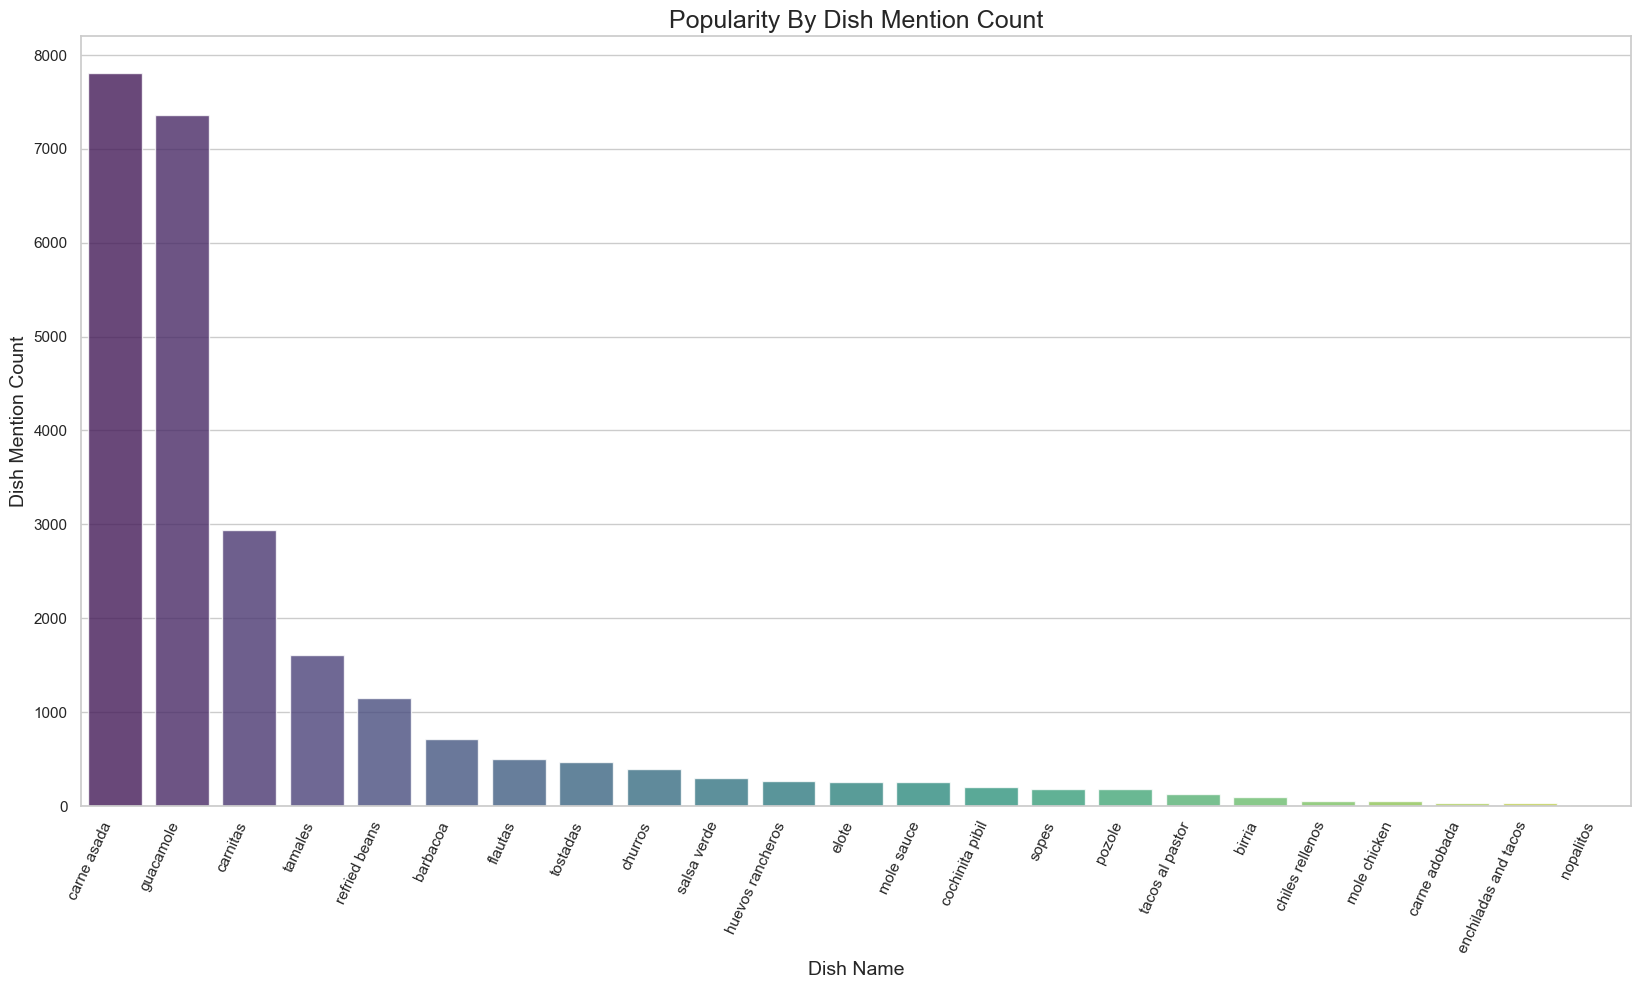

In [311]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Create a color palette
colors = sns.color_palette("viridis", len(top_dishes_df))

# Create a bar plot for the dish mention counts with colors
sns.barplot(x="Dish_Name", y="Count", data=top_dishes_df, alpha=0.8, palette=colors)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=65, horizontalalignment='right')

# Add titles and labels with specified font sizes
plt.title('Popularity By Dish Mention Count', fontsize=18)
plt.xlabel('Dish Name', fontsize=14)
plt.ylabel('Dish Mention Count', fontsize=14)

# Display the plot
plt.show()


In [312]:
# Initialize a dictionary to count the unique restaurants mentioning each dish
dish_restaurant_mentions = {dish: 0 for dish in mexican_dish_list}

# Loop through each dish
for dish in mexican_dish_list:
    # Initialize a set to track unique restaurants mentioning the dish
    restaurants_mentioning_dish = set()
    
    # Loop through each review and check if the dish is mentioned
    for i, review in enumerate(review_texts):
        cleaned_review = review.replace("\t", " ")\
                               .replace("\n", " ")\
                               .replace("\r", " ")\
                               .lower().strip()
        
        if dish.lower() in cleaned_review:
            restaurants_mentioning_dish.add(restaurant_names[i])
    
    # Count the number of unique restaurants mentioning the dish
    dish_restaurant_mentions[dish] = len(restaurants_mentioning_dish)

# Output the dictionary containing dish and restaurant mentions
dish_restaurant_mentions


{'carne asada': 692,
 'refried beans': 411,
 'mole sauce': 104,
 'tacos al pastor': 58,
 'huevos rancheros': 110,
 'enchiladas and tacos': 30,
 'guacamole': 674,
 'salsa verde': 161,
 'chiles rellenos': 37,
 'tamales': 295,
 'pozole': 65,
 'elote': 40,
 'tostadas': 196,
 'flautas': 192,
 'birria': 40,
 'churros': 116,
 'barbacoa': 95,
 'sopes': 71,
 'cochinita pibil': 25,
 'carne adobada': 18,
 'carnitas': 451,
 'nopalitos': 9,
 'mole chicken': 22}

In [313]:
N = 25
sorted_dish_counter = {k: v for k, v in sorted(dish_rest_counter.items(), key=lambda item: item[1], reverse=True)}
topN = dict(itertools.islice(sorted_dish_counter.items(), N))
dish_count_df2 = pd.DataFrame(topN.items(), columns=["Dish_Name", "Count"])




In [314]:
topN

{'carne asada': 692,
 'guacamole': 674,
 'carnitas': 451,
 'refried beans': 411,
 'tamales': 295,
 'tostadas': 196,
 'flautas': 192,
 'salsa verde': 161,
 'churros': 117,
 'huevos rancheros': 110,
 'mole sauce': 104,
 'barbacoa': 95,
 'sopes': 71,
 'pozole': 65,
 'tacos al pastor': 57,
 'elote': 40,
 'birria': 40,
 'chiles rellenos': 37,
 'enchiladas and tacos': 30,
 'cochinita pibil': 25,
 'mole chicken': 22,
 'carne adobada': 18,
 'nopalitos': 9}

C:\Users\kasam\AppData\Local\Temp\ipykernel_34236\875036610.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Dish_Name", y="Count", data=dish_count_df2, alpha=0.8, palette=colors)
C:\Users\kasam\AppData\Local\Temp\ipykernel_34236\875036610.py:5: UserWarning: 
The palette list has fewer values (10) than needed (23) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x="Dish_Name", y="Count", data=dish_count_df2, alpha=0.8, palette=colors)


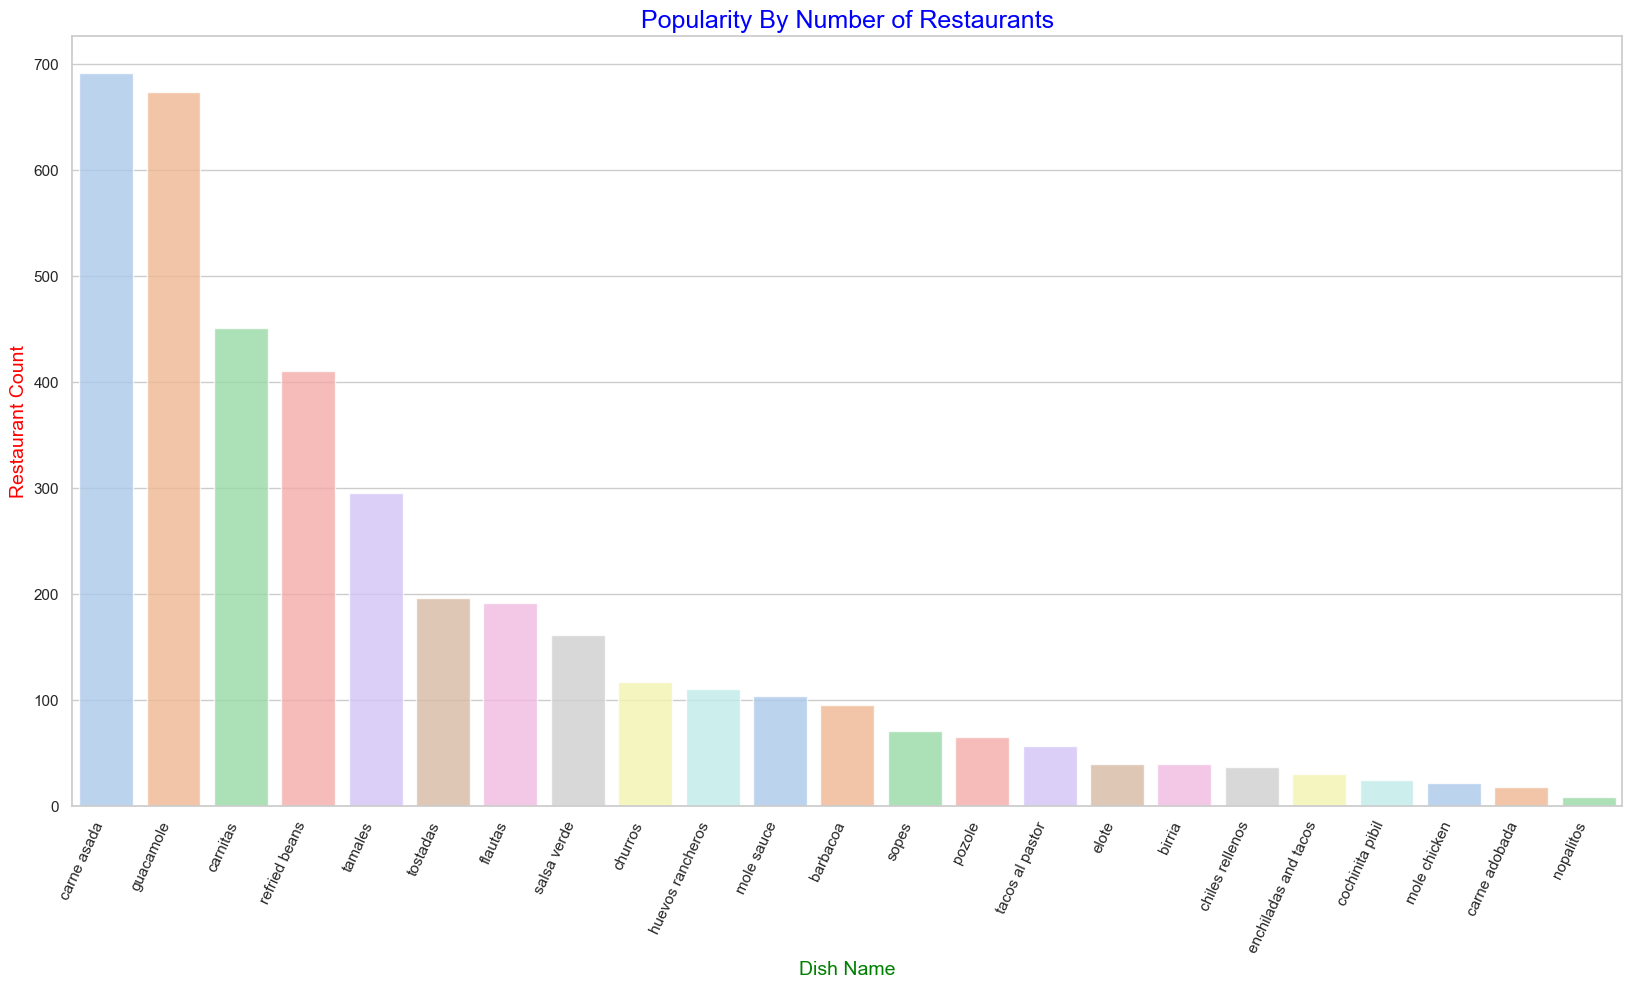

In [315]:
# Define color palette
colors = sns.color_palette('pastel')

plt.figure(figsize=(20,10))
sns.barplot(x="Dish_Name", y="Count", data=dish_count_df2, alpha=0.8, palette=colors)
plt.xticks(rotation=65, horizontalalignment='right')
plt.title('Popularity By Number of Restaurants', fontsize=18, color='blue')  # Title color
plt.xlabel('Dish Name', fontsize=14, color='green')  # X-axis label color
plt.ylabel('Restaurant Count', fontsize=14, color='red')  # Y-axis label color
plt.show()


In [316]:
# Initialize dataframe
dish_rating_df = pd.DataFrame({
    'Dish_Name': dish_list,
    'Total_Rating': 0,
    'Review_Count': 0
})

# Normalize reviews and calculate ratings
for dish_index, dish_name in enumerate(dish_list):
    for review_index, review in enumerate(reviews):
        if stars[review_index] == 3:  # Skip "neutral" reviews by stars
            continue
        
        # Normalize review text
        review = review.replace("\t", " ").replace("\n", "").replace("\r", "").lower().strip()
        
        if dish_name in review:
            dish_rating_df.loc[dish_index, 'Review_Count'] += 1
            dish_rating_df.loc[dish_index, 'Total_Rating'] += stars[review_index]

# Compute average rating
dish_rating_df['Average_Rating'] = dish_rating_df['Total_Rating'] / dish_rating_df['Review_Count'].replace(0, 1)

# Display the dataframe (optional)
print(dish_rating_df)


               Dish_Name  Total_Rating  Review_Count  Average_Rating
0            carne asada         20137          5044        3.992268
1          refried beans          3018           863        3.497103
2             mole sauce           699           181        3.861878
3        tacos al pastor           441           105        4.200000
4       huevos rancheros           857           213        4.023474
5   enchiladas and tacos           114            27        4.222222
6              guacamole         18570          4905        3.785933
7            salsa verde           930           230        4.043478
8        chiles rellenos           115            32        3.593750
9                tamales          3878           969        4.002064
10                pozole           485           116        4.181034
11                 elote           752           174        4.321839
12              tostadas          1514           360        4.205556
13               flautas          

In [317]:
dish_rating_df = dish_rating_df.sort_values(by=['Average_Rating', 'Review_Count'], ascending=[False, False])


In [318]:
dish_rating_df

,Dish_Name,Total_Rating,Review_Count,Average_Rating
21,nopalitos,42,9,4.666667
11,elote,752,174,4.321839
22,mole chicken,188,44,4.272727
18,cochinita pibil,650,153,4.248366
17,sopes,547,129,4.240310
14,birria,245,58,4.224138
5,enchiladas and tacos,114,27,4.222222
12,tostadas,1514,360,4.205556
15,churros,1169,278,4.205036
3,tacos al pastor,441,105,4.200000


C:\Users\kasam\AppData\Local\Temp\ipykernel_34236\1015645633.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Dish_Name", y="Average_Rating", data=dish_rating_df, alpha=0.8, palette=colors)


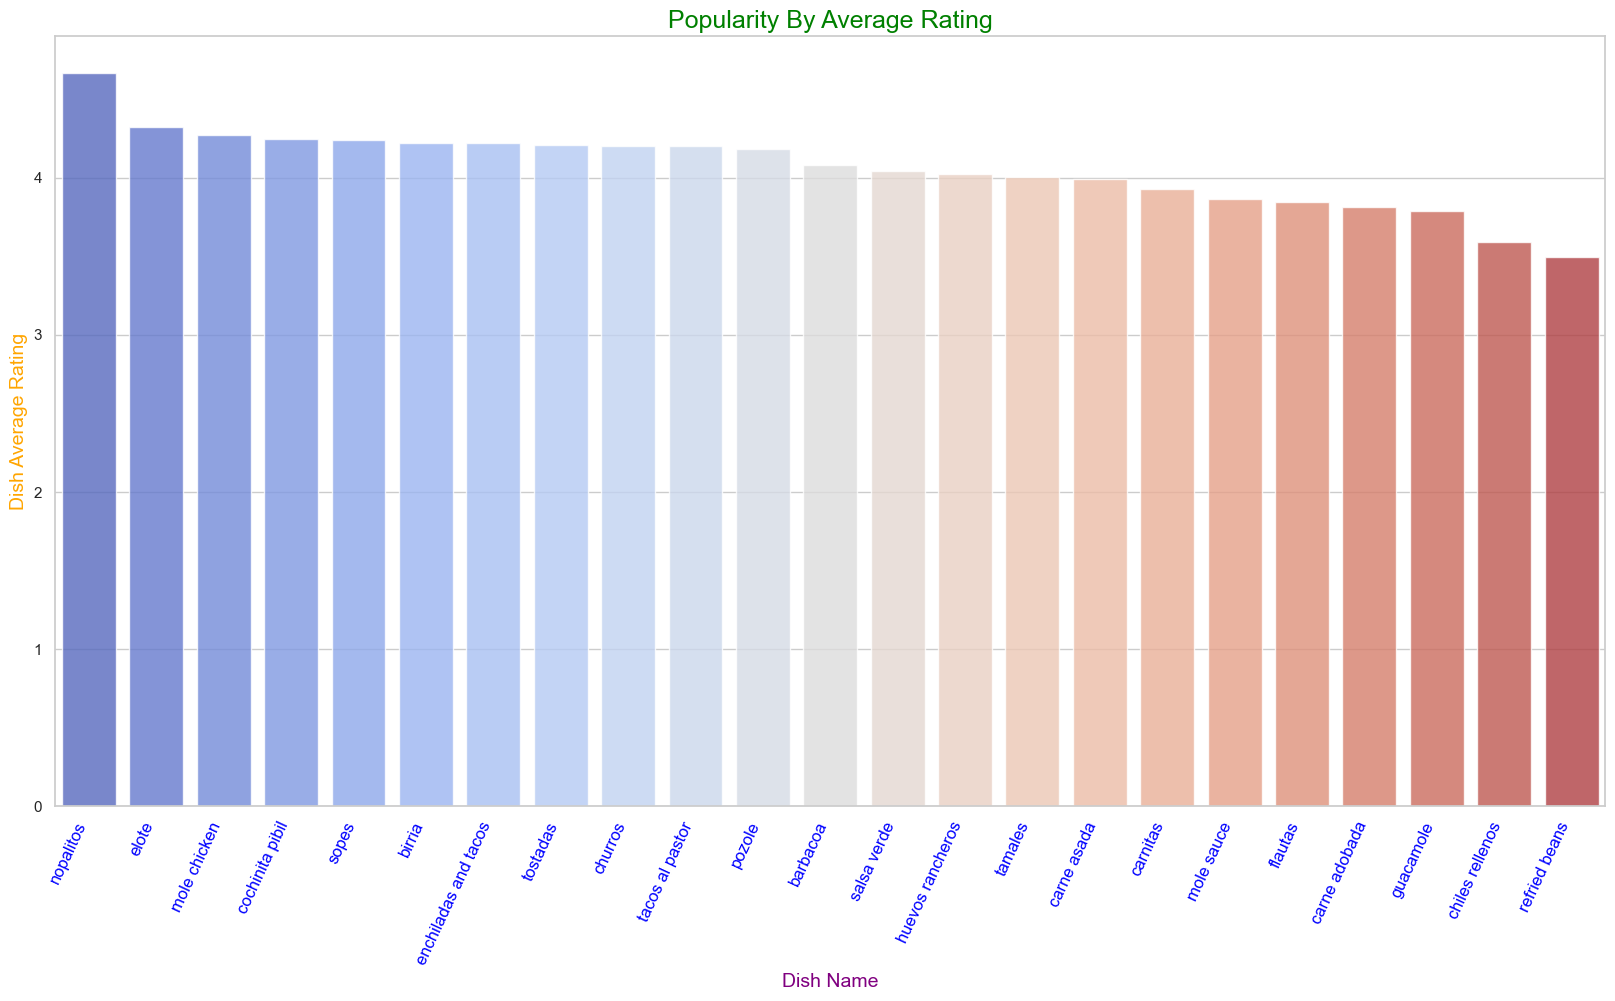

In [319]:
# Define color palette
colors = sns.color_palette('coolwarm', len(dish_rating_df))

plt.figure(figsize=(20, 10))
sns.barplot(x="Dish_Name", y="Average_Rating", data=dish_rating_df, alpha=0.8, palette=colors)
plt.xticks(rotation=65, horizontalalignment='right', fontsize=12, color='blue')  # Adjusting rotation and color
plt.title('Popularity By Average Rating', fontsize=18, color='green')  # Title color
plt.xlabel('Dish Name', fontsize=14, color='purple')  # X-axis label color
plt.ylabel('Dish Average Rating', fontsize=14, color='orange')  # Y-axis label color
plt.show()


In [320]:
import pandas as pd
from textblob import TextBlob
import time

# Start timing
start_time = time.time()

# Initialize dataframe
dish_sentiment_df = pd.DataFrame({
    'Dish_Name': dish_list,
    'Total_Sentiment': 0,
    'Review_Count': 0
})

# Normalize reviews and calculate sentiment
for i, dish in enumerate(dish_list):
    for j, review in enumerate(reviews):
        if stars[j] == 3:  # Skip neutral reviews by stars
            continue
        
        review = review.replace("\t", " ").replace("\n", "").replace("\r", "").lower().strip()
        
        if dish in review:
            toAnalyze = TextBlob(review)
            sentiment = toAnalyze.sentiment.polarity
            scaled_sentiment = 5 * (sentiment + 1)
            
            dish_sentiment_df.loc[i, 'Review_Count'] += 1
            # Convert scaled_sentiment to int before adding to Total_Sentiment
            dish_sentiment_df.loc[i, 'Total_Sentiment'] += int(scaled_sentiment)

# Compute average sentiment
dish_sentiment_df['Average_Sentiment'] = dish_sentiment_df['Total_Sentiment'] / dish_sentiment_df['Review_Count'].replace(0, 1)

# End timing
end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")

# Display the dataframe (optional)
print(dish_sentiment_df)



Execution time: 47.66965675354004 seconds
               Dish_Name  Total_Sentiment  Review_Count  Average_Sentiment
0            carne asada            29133          5044           5.775773
1          refried beans             4685           863           5.428737
2             mole sauce             1001           181           5.530387
3        tacos al pastor              620           105           5.904762
4       huevos rancheros             1218           213           5.718310
5   enchiladas and tacos              160            27           5.925926
6              guacamole            27931          4905           5.694393
7            salsa verde             1317           230           5.726087
8        chiles rellenos              184            32           5.750000
9                tamales             5570           969           5.748194
10                pozole              693           116           5.974138
11                 elote             1035           174   

In [321]:
# Sort dataframe by Average_Sentiment and Review_Count
dish_sentiment_df = dish_sentiment_df.sort_values(by=['Average_Sentiment', 'Review_Count'], ascending=[False, False])

# Display sorted dataframe
print(dish_sentiment_df)


               Dish_Name  Total_Sentiment  Review_Count  Average_Sentiment
10                pozole              693           116           5.974138
19         carne adobada              161            27           5.962963
11                 elote             1035           174           5.948276
5   enchiladas and tacos              160            27           5.925926
3        tacos al pastor              620           105           5.904762
17                 sopes              760           129           5.891473
15               churros             1636           278           5.884892
12              tostadas             2083           360           5.786111
14                birria              335            58           5.775862
0            carne asada            29133          5044           5.775773
16              barbacoa             2711           471           5.755839
8        chiles rellenos              184            32           5.750000
9                tamales 

C:\Users\kasam\AppData\Local\Temp\ipykernel_34236\3362955176.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Dish_Name", y="Average_Sentiment", data=dish_sentiment_df, alpha=0.8, palette=colors)


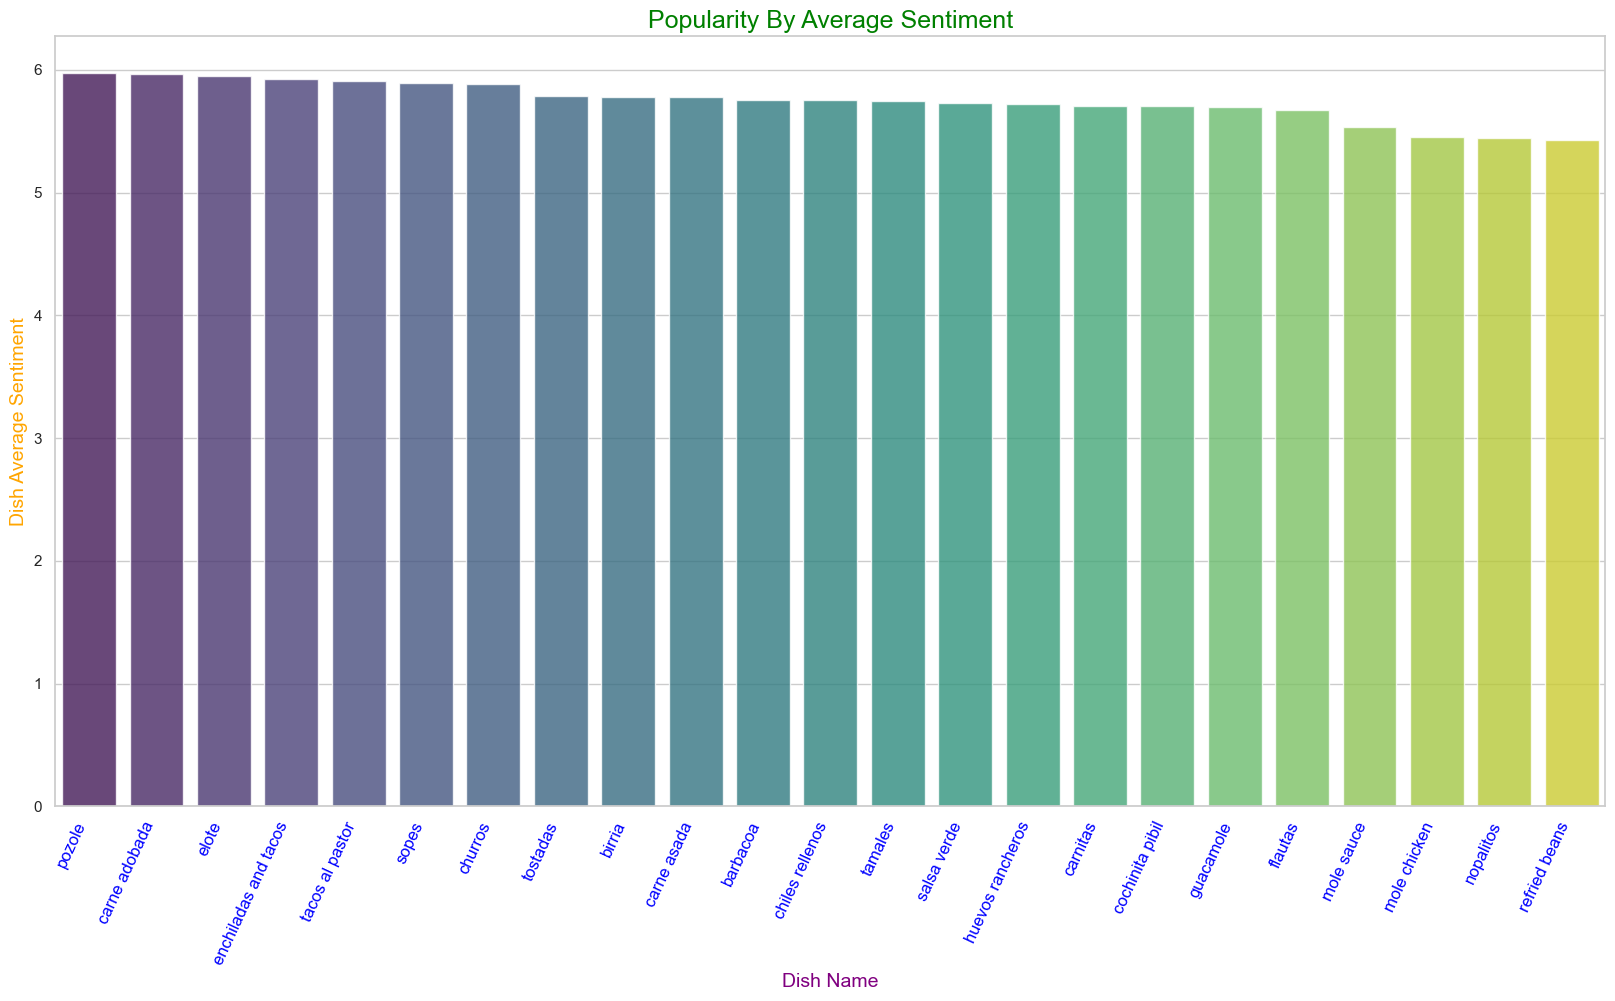

In [322]:
# Define color palette
colors = sns.color_palette('viridis', len(dish_sentiment_df))

plt.figure(figsize=(20, 10))
sns.barplot(x="Dish_Name", y="Average_Sentiment", data=dish_sentiment_df, alpha=0.8, palette=colors)
plt.xticks(rotation=65, horizontalalignment='right', fontsize=12, color='blue')  # Adjusting rotation and color
plt.title('Popularity By Average Sentiment', fontsize=18, color='green')  # Title color
plt.xlabel('Dish Name', fontsize=14, color='purple')  # X-axis label color
plt.ylabel('Dish Average Sentiment', fontsize=14, color='orange')  # Y-axis label color
plt.show()


In [323]:
# Create the dataframe directly without intermediate lists
comparison_df = pd.DataFrame({
    'rank': range(1, len(dish_list) + 1),
    'A_dish_count': dish_count_df['Dish_Name'],
    'B_restaurant_count': dish_count_df2['Dish_Name'],
    'C_avg_rating': dish_rating_df['Dish_Name'],
    'D_avg_sentiment': dish_sentiment_df['Dish_Name']
})

# Display the dataframe
print(comparison_df)


    rank          A_dish_count    B_restaurant_count          C_avg_rating  \
0      1           carne asada           carne asada           carne asada   
1      2             guacamole             guacamole         refried beans   
2      3              carnitas              carnitas            mole sauce   
3      4               tamales         refried beans       tacos al pastor   
4      5         refried beans               tamales      huevos rancheros   
5      6              barbacoa              tostadas  enchiladas and tacos   
6      7               flautas               flautas             guacamole   
7      8              tostadas           salsa verde           salsa verde   
8      9               churros               churros       chiles rellenos   
9     10           salsa verde      huevos rancheros               tamales   
10    11      huevos rancheros            mole sauce                pozole   
11    12                 elote              barbacoa            

In [324]:
#Task 5: Restaurant Recommendation


In [325]:
selected_dishes = ['fried egg', 'fried chicken', 'fried rice']

In [326]:
from collections import OrderedDict

# Collect unique restaurants
unique_restaurants = list(set(rest_name))

# Initialize dictionaries
rest_total_rating = OrderedDict((restaurant, 0) for restaurant in unique_restaurants)
rest_review_counter = OrderedDict((restaurant, 0) for restaurant in unique_restaurants)

# Iterate over reviews
for i, review in enumerate(reviews):
    review = review.replace("\t", " ").replace("\n", "").replace("\r", "").lower().strip()

    # Check if any selected dish is mentioned in the review
    if any(dish in review for dish in selected_dishes):
        rest_review_counter[rest_name[i]] += 1
        rest_total_rating[rest_name[i]] += stars[i]

# Optionally, you can convert rest_total_rating and rest_review_counter to DataFrame if needed
# Example:
# rating_df = pd.DataFrame({'Restaurant': list(rest_total_rating.keys()),
#                           'Total_Rating': list(rest_total_rating.values()),
#                           'Review_Count': list(rest_review_counter.values())})

# Print or return results as needed
print("Total Ratings by Restaurant:")
for restaurant, total_rating in rest_total_rating.items():
    print(f"{restaurant}: {total_rating}")

print("\nReview Counts by Restaurant:")
for restaurant, review_count in rest_review_counter.items():
    print(f"{restaurant}: {review_count}")

    

Total Ratings by Restaurant:
Garnachas Mexican Street Food: 0
Restaurant 2 DOS Potrillos: 0
Blue Agave Mexican Cantina: 0
Garduno's Margarita Factory & Blue Agave: 0
Salty Senorita North: 0
Jalapeno Grill: 0
Las Palmas Mariachi Restaurant: 0
Roberto's Mexican Food: 0
El Cazador: 0
Los Gringos Locos Grill & Cantina: 0
El Menudazo Mexican Food Express: 0
Baja Joes: 0
Galerias Gourmet: 0
Tacos Sahuayo: 0
Trailer Park Restaurant: 0
Diamond Dot Market: 0
Casa Ramos: 0
Pasqual's: 0
Dos Amigos Fresh Mex-Grill: 0
El Gran Taco: 0
Valle Luna: 5
Original Lindo Michoacan: 4
Huauchinango: 0
Nando's Hideaway: 0
Baja Taco: 0
La Paloma Mexican Food: 0
La Hacienda Restaurant: 0
Gecko Grill's Cravings: 0
Sofia's Mexican Food: 0
SumoMaya: 5
Los Compadres Mexican Food: 0
New Mexican Grill: 19
Comedor Guadalajara: 0
Los Reyes de la Torta: 0
Baja Fresh Mexican Grill: 0
Mariscos Acapulco: 0
Chicken and Grill: 0
Rita's Mexican Food: 0
Joyride Central: 0
La Salsa: 0
Super B Burrito: 0
Hecho en Vegas: 2
SalvaMe

In [327]:

# rest_rating_df = pd.DataFrame(columns=['Restaurant_Name', 'Total_Rating', "Review_Count"])
# rest_rating_df['Restaurant_Name'] = list(rest_total_rating.keys())
# rest_rating_df['Total_Rating'] = list(rest_total_rating.values())
# rest_rating_df['Review_Count'] = list(rest_review_counter.values())
# rest_rating_df['Average_Rating'] = (rest_rating_df['Total_Rating'] + 1e-3)/ (rest_rating_df['Review_Count'] + 1e-3)

# Assuming rest_total_rating and rest_review_counter are already defined as dictionaries

# Create DataFrame directly
rest_rating_df = pd.DataFrame({
    'Restaurant_Name': list(rest_total_rating.keys()),
    'Total_Rating': list(rest_total_rating.values()),
    'Review_Count': list(rest_review_counter.values())
})

# Calculate Average_Rating
rest_rating_df['Average_Rating'] = (rest_rating_df['Total_Rating'] + 1e-3) / (rest_rating_df['Review_Count'] + 1e-3)

# Display the DataFrame
print(rest_rating_df)

                                            Restaurant_Name  Total_Rating  \
0                             Garnachas Mexican Street Food             0   
1                                Restaurant 2 DOS Potrillos             0   
2                                Blue Agave Mexican Cantina             0   
3                  Garduno's Margarita Factory & Blue Agave             0   
4                                      Salty Senorita North             0   
5                                            Jalapeno Grill             0   
6                            Las Palmas Mariachi Restaurant             0   
7                                    Roberto's Mexican Food             0   
8                                                El Cazador             0   
9                         Los Gringos Locos Grill & Cantina             0   
10                         El Menudazo Mexican Food Express             0   
11                                                Baja Joes             0   

In [328]:
rest_rating_df

,Restaurant_Name,Total_Rating,Review_Count,Average_Rating
0,Garnachas Mexican Street Food,0,0,1.000000
1,Restaurant 2 DOS Potrillos,0,0,1.000000
2,Blue Agave Mexican Cantina,0,0,1.000000
3,Garduno's Margarita Factory & Blue Agave,0,0,1.000000
4,Salty Senorita North,0,0,1.000000
5,Jalapeno Grill,0,0,1.000000
6,Las Palmas Mariachi Restaurant,0,0,1.000000
7,Roberto's Mexican Food,0,0,1.000000
8,El Cazador,0,0,1.000000
9,Los Gringos Locos Grill & Cantina,0,0,1.000000


In [329]:
# rest_rating_df = rest_rating_df.sort_values(by=['Average_Rating', 'Review_Count'], axis=0, ascending=False)\
#                                .reset_index(drop=True)
# display(rest_rating_df.head(25))
# top10_A = rest_rating_df[rest_rating_df['Review_Count'] >= 5].head(10)
# top10_A

# Assuming rest_rating_df is already defined and contains necessary columns

# Sort rest_rating_df by Average_Rating and Review_Count
rest_rating_df = rest_rating_df.sort_values(by=['Average_Rating', 'Review_Count'], ascending=[False, False]).reset_index(drop=True)

# Display the top 25 restaurants
print(rest_rating_df.head(25))

# Filter top 10 restaurants with Review_Count >= 5
top10_A = rest_rating_df[rest_rating_df['Review_Count'] >= 5].head(10)

# Display the top 10 restaurants
print(top10_A)

                    Restaurant_Name  Total_Rating  Review_Count  \
0               Sí Señor Restaurant            10             2   
1       El Hefe Supermacho Taqueria            10             2   
2                   Dick's Hideaway            10             2   
3                        Valle Luna             5             1   
4                Tienda Los Gemelos             5             1   
5                         Taco Haus             5             1   
6                       Don Tortaco             5             1   
7          La Tolteca Mexican Foods             5             1   
8                  El Nuevo Taquito             5             1   
9                       Dos Caminos             5             1   
10                   El Torito Cafe             5             1   
11                          Rokerij             5             1   
12                New Mexican Grill            19             4   
13                   Eldorado Grill            28             

C:\Users\kasam\AppData\Local\Temp\ipykernel_34236\356515020.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Restaurant_Name", y="Average_Rating", data=top10_A, alpha=0.8, palette=colors)


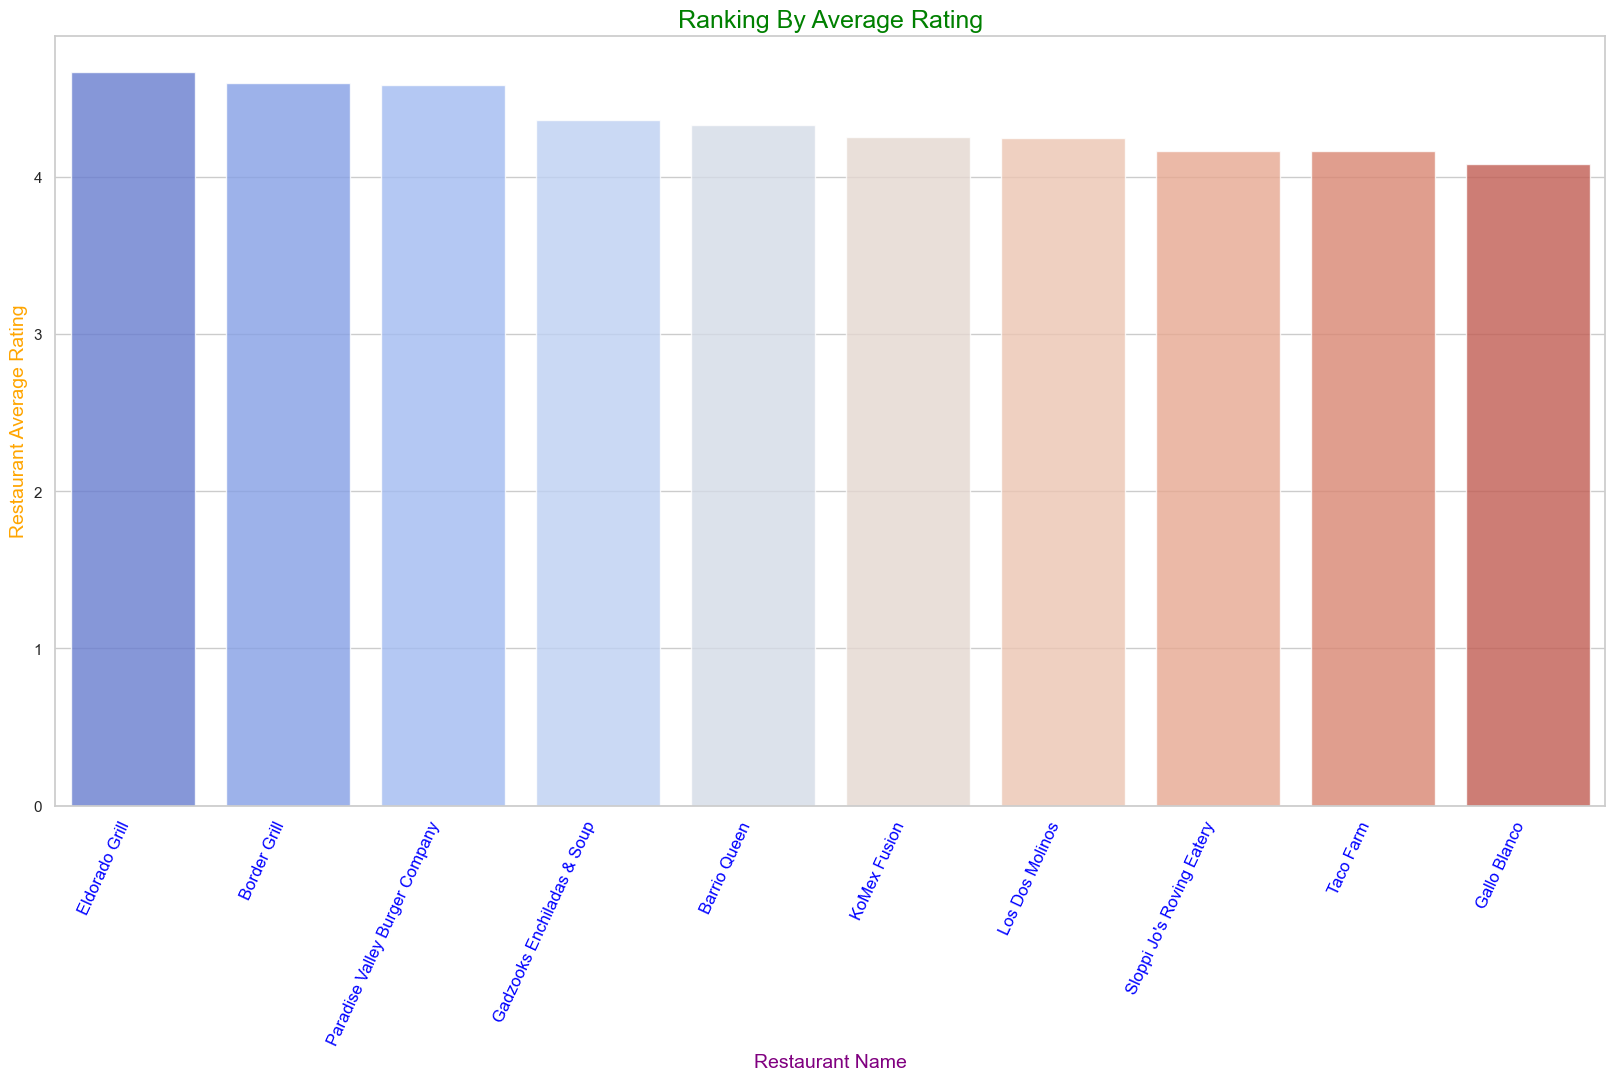

In [330]:
# Assuming top10_A DataFrame is already defined

# Define color palette
colors = sns.color_palette('coolwarm', len(top10_A))

plt.figure(figsize=(20, 10))
sns.barplot(x="Restaurant_Name", y="Average_Rating", data=top10_A, alpha=0.8, palette=colors)
plt.xticks(rotation=65, horizontalalignment='right', fontsize=12, color='blue')  # Adjusting rotation and color
plt.title('Ranking By Average Rating', fontsize=18, color='green')  # Title color
plt.xlabel('Restaurant Name', fontsize=14, color='purple')  # X-axis label color
plt.ylabel('Restaurant Average Rating', fontsize=14, color='orange')  # Y-axis label color
plt.show()

In [331]:
from collections import OrderedDict
from textblob import TextBlob  # Assuming TextBlob is imported for sentiment analysis

# Assuming rest_name, reviews, stars, and selected_dishes are already defined

# Get unique restaurants
unique_restaurants = list(set(rest_name))

# Initialize OrderedDicts for sentiment aggregation
rest_total_sentiment = OrderedDict((restaurant, 0) for restaurant in unique_restaurants)
rest_review_counter = OrderedDict((restaurant, 0) for restaurant in unique_restaurants)

# Iterate over reviews
for i, review in enumerate(reviews):
    review = review.replace("\t", " ").replace("\n", "").replace("\r", "").lower().strip()
    
    # Skip neutral reviews by stars (stars[i] == 3)
    if stars[i] == 3:
        continue
    
    # Check if any selected dish is mentioned in the review
    if any(dish in review for dish in selected_dishes):
        toAnalyze = TextBlob(review)
        sentiment = toAnalyze.sentiment.polarity
        scaled_sentiment = 5 * (sentiment + 1)
        
        # Update counters for sentiment aggregation
        rest_review_counter[rest_name[i]] += 1
        rest_total_sentiment[rest_name[i]] += scaled_sentiment


# Print or return results as needed
print("Sentiment Analysis Results:")
for restaurant, total_sentiment in rest_total_sentiment.items():
    print(f"{restaurant}: Total Sentiment - {total_sentiment}, Review Count - {rest_review_counter[restaurant]}")


Sentiment Analysis Results:
Garnachas Mexican Street Food: Total Sentiment - 0, Review Count - 0
Restaurant 2 DOS Potrillos: Total Sentiment - 0, Review Count - 0
Blue Agave Mexican Cantina: Total Sentiment - 0, Review Count - 0
Garduno's Margarita Factory & Blue Agave: Total Sentiment - 0, Review Count - 0
Salty Senorita North: Total Sentiment - 0, Review Count - 0
Jalapeno Grill: Total Sentiment - 0, Review Count - 0
Las Palmas Mariachi Restaurant: Total Sentiment - 0, Review Count - 0
Roberto's Mexican Food: Total Sentiment - 0, Review Count - 0
El Cazador: Total Sentiment - 0, Review Count - 0
Los Gringos Locos Grill & Cantina: Total Sentiment - 0, Review Count - 0
El Menudazo Mexican Food Express: Total Sentiment - 0, Review Count - 0
Baja Joes: Total Sentiment - 0, Review Count - 0
Galerias Gourmet: Total Sentiment - 0, Review Count - 0
Tacos Sahuayo: Total Sentiment - 0, Review Count - 0
Trailer Park Restaurant: Total Sentiment - 0, Review Count - 0
Diamond Dot Market: Total Sen

In [332]:
# Assuming rest_total_sentiment and rest_review_counter are already defined as dictionaries

# Create DataFrame directly
rest_sentiment_df = pd.DataFrame({
    'Restaurant_Name': list(rest_total_sentiment.keys()),
    'Total_Sentiment': list(rest_total_sentiment.values()),
    'Review_Count': list(rest_review_counter.values())
})

# Calculate Average_Sentiment, avoiding division by zero
rest_sentiment_df['Average_Sentiment'] = (rest_sentiment_df['Total_Sentiment'] + 1e-3) / (rest_sentiment_df['Review_Count'] + 1e-3)

# Display the DataFrame
print(rest_sentiment_df)

                                            Restaurant_Name  Total_Sentiment  \
0                             Garnachas Mexican Street Food         0.000000   
1                                Restaurant 2 DOS Potrillos         0.000000   
2                                Blue Agave Mexican Cantina         0.000000   
3                  Garduno's Margarita Factory & Blue Agave         0.000000   
4                                      Salty Senorita North         0.000000   
5                                            Jalapeno Grill         0.000000   
6                            Las Palmas Mariachi Restaurant         0.000000   
7                                    Roberto's Mexican Food         0.000000   
8                                                El Cazador         0.000000   
9                         Los Gringos Locos Grill & Cantina         0.000000   
10                         El Menudazo Mexican Food Express         0.000000   
11                                      

In [333]:

# rest_sentiment_df = rest_sentiment_df.sort_values(by=['Average_Sentiment', 'Review_Count'], axis=0, ascending=False)\
#                                      .reset_index(drop=True)
# display(rest_sentiment_df.head(25))
# top10_B = rest_sentiment_df[rest_sentiment_df['Review_Count'] >= 5].head(10)
# top10_B

# Sort rest_sentiment_df by Average_Sentiment and Review_Count
rest_sentiment_df = rest_sentiment_df.sort_values(by=['Average_Sentiment', 'Review_Count'], ascending=[False, False]).reset_index(drop=True)

# Display the top 25 restaurants
print(rest_sentiment_df.head(25))

# Filter top 10 restaurants with Review_Count >= 5
top10_B = rest_sentiment_df[rest_sentiment_df['Review_Count'] >= 5].head(10)

# Display the top 10 restaurants
print(top10_B)

                            Restaurant_Name  Total_Sentiment  Review_Count  \
0                               Don Tortaco         8.087500             1   
1                   Los Jarritos Restaurant         7.408730             1   
2                                   Rokerij         7.327652             1   
3   El Palacio Mexican Restaurant & Cantina         7.031250             1   
4                             Tortas El Rey         7.017857             1   
5                             Phat Phrank's         6.823125             1   
6                              Gallo Blanco        61.338366             9   
7                          Asi Es My Tierra         6.743750             1   
8                             Casa Don Juan         6.659774             1   
9                          El Nuevo Taquito         6.653968             1   
10                        Blue Adobe Grille        39.832168             6   
11                          Dick's Hideaway        13.239539    

C:\Users\kasam\AppData\Local\Temp\ipykernel_34236\2138727178.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Restaurant_Name", y="Average_Sentiment", data=top10_B, alpha=0.8, palette=colors)


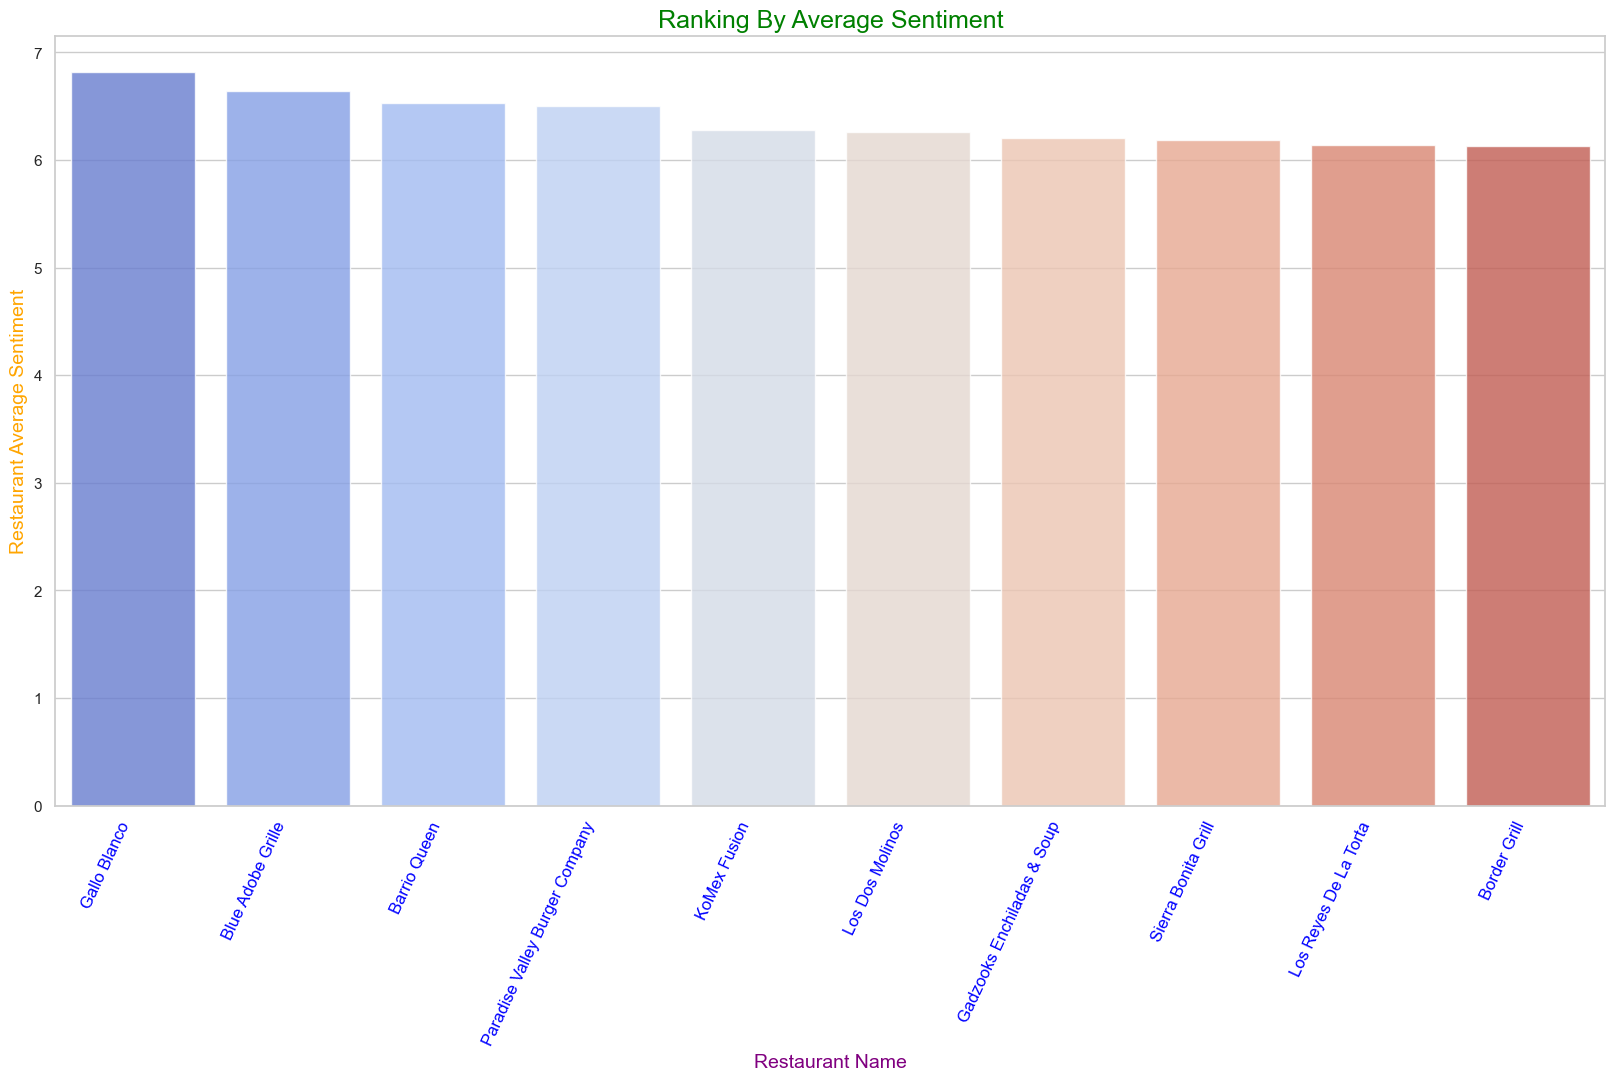

In [334]:
# Define color palette
colors = sns.color_palette('coolwarm', len(top10_B))

plt.figure(figsize=(20, 10))
sns.barplot(x="Restaurant_Name", y="Average_Sentiment", data=top10_B, alpha=0.8, palette=colors)
plt.xticks(rotation=65, horizontalalignment='right', fontsize=12, color='blue')  # Adjusting rotation and color
plt.title('Ranking By Average Sentiment', fontsize=18, color='green')  # Title color
plt.xlabel('Restaurant Name', fontsize=14, color='purple')  # X-axis label color
plt.ylabel('Restaurant Average Sentiment', fontsize=14, color='orange')  # Y-axis label color
plt.show()


In [335]:
# Assuming top10_A and top10_B DataFrames are already defined

# Create combined dictionary
combined_dict = {
    'rank': list(range(1, 11)),  # Assuming we want ranks from 1 to 10
    'A_avg_rating': list(top10_A['Restaurant_Name']),
    'B_avg_sentiment': list(top10_B['Restaurant_Name'])
}

# Create DataFrame directly from dictionary
comparison_df = pd.DataFrame(combined_dict)

# Display the DataFrame
print(comparison_df)

   rank                    A_avg_rating                 B_avg_sentiment
0     1                  Eldorado Grill                    Gallo Blanco
1     2                    Border Grill               Blue Adobe Grille
2     3  Paradise Valley Burger Company                    Barrio Queen
3     4      Gadzooks Enchiladas & Soup  Paradise Valley Burger Company
4     5                    Barrio Queen                    KoMex Fusion
5     6                    KoMex Fusion                 Los Dos Molinos
6     7                 Los Dos Molinos      Gadzooks Enchiladas & Soup
7     8       Sloppi Jo's Roving Eatery             Sierra Bonita Grill
8     9                       Taco Farm           Los Reyes De La Torta
9    10                    Gallo Blanco                    Border Grill
